<a href="https://colab.research.google.com/github/piyal-nagda/FMML_PROJECTS_AND_ASSIGNMENTS_PRIYAL/blob/main/FMML_M9L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

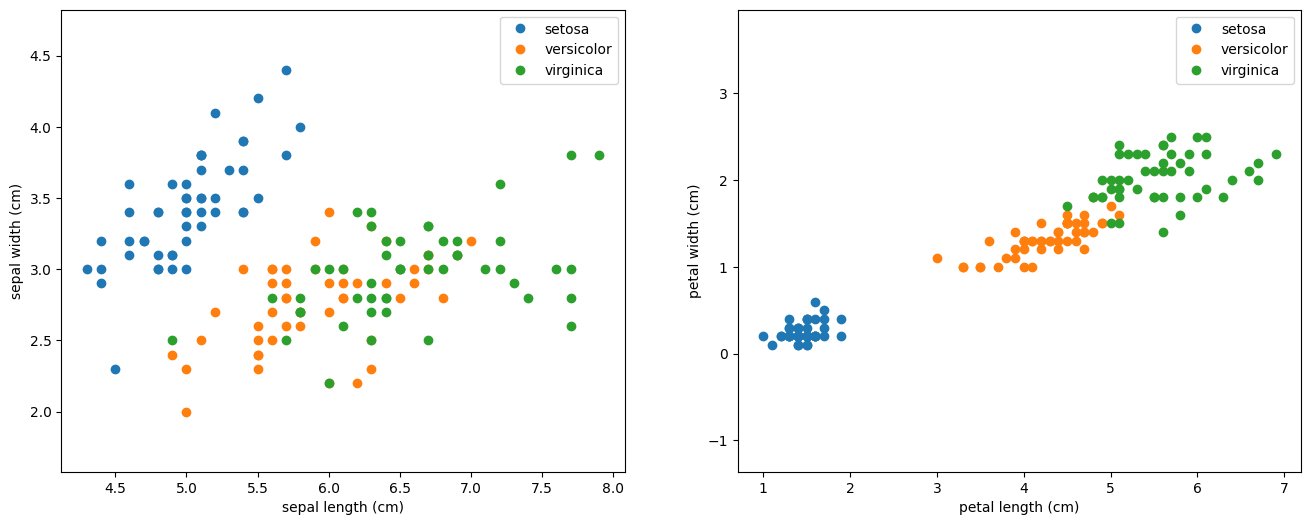

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 230.66it/s]


# Plot training progress

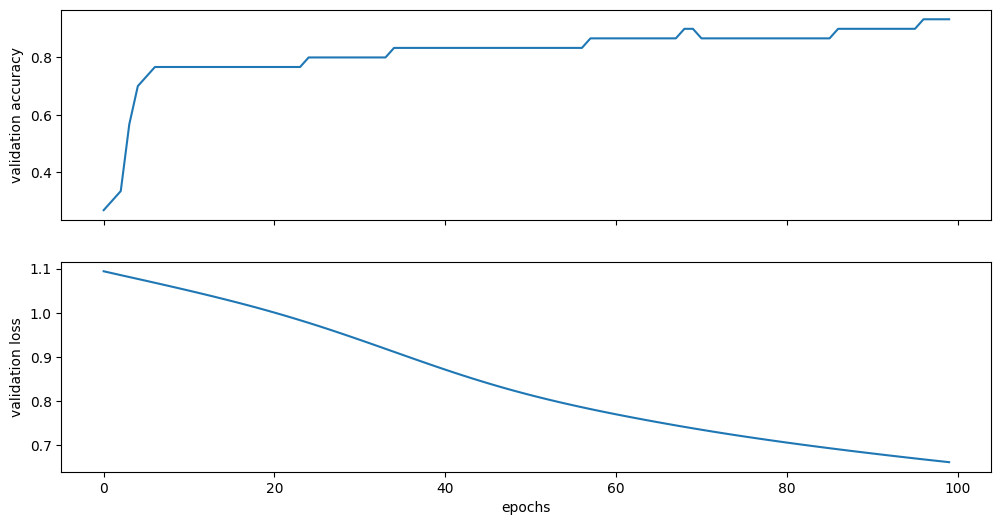

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

In [9]:
# question 1
class Model_V1(nn.Module):
    def __init__(self, input_dim):
        super(Model_V1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 40)
        self.layer3 = nn.Linear(40, 30)
        self.layer4 = nn.Linear(30, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x


In [10]:
# question 2
class Model_V2(nn.Module):
    def __init__(self, input_dim):
        super(Model_V2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [11]:
# question 3
class Model_V3(nn.Module):
    def __init__(self, input_dim):
        super(Model_V3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x


In [13]:
# question 1 calling
model = Model_V1(input_dim=4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    inputs = Variable(torch.FloatTensor(X_train))
    labels = Variable(torch.LongTensor(y_train))

    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    # Optionally print loss
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

Epoch 0, Loss: 1.0952
Epoch 10, Loss: 0.7320
Epoch 20, Loss: 0.5898
Epoch 30, Loss: 0.5665
Epoch 40, Loss: 0.5606
Epoch 50, Loss: 0.5601
Epoch 60, Loss: 0.5599
Epoch 70, Loss: 0.5599
Epoch 80, Loss: 0.5598
Epoch 90, Loss: 0.5598


In [14]:

# question 2 answer
model = Model_V2(input_dim=4)
model.eval()
with torch.no_grad():
    inputs = Variable(torch.FloatTensor(X_test))
    labels = torch.LongTensor(y_test)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == labels).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.27


In [15]:
# question 3 answer
model = Model_V3(input_dim=4)
model.eval()
with torch.no_grad():
    inputs = Variable(torch.FloatTensor(X_test))
    labels = torch.LongTensor(y_test)
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == labels).sum().item() / len(y_test)
    print(f'Test Accuracy: {accuracy:.2f}')


Test Accuracy: 0.27


Model_V1 Accuracy: 0.93
Model_V2 Accuracy: 0.93
Model_V3 Accuracy: 0.97


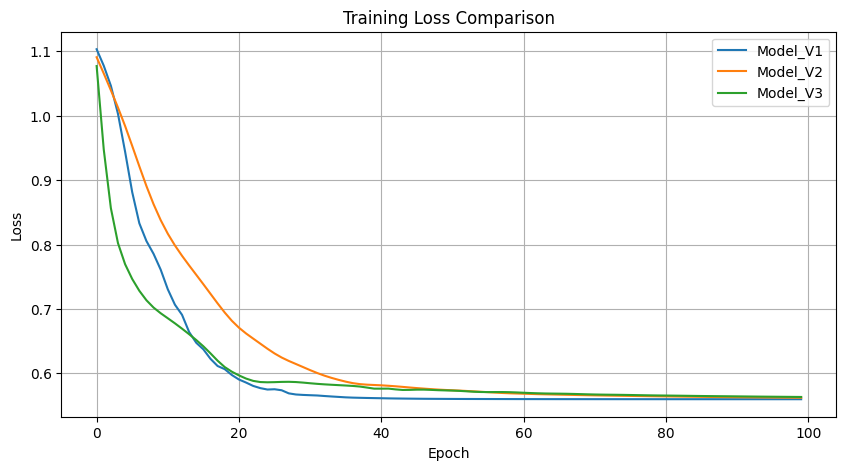

In [18]:
# also all in one

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess data
iris = load_iris()
X = iris['data']
y = iris['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2)

# Define all model variants
class Model_V1(nn.Module):
    def __init__(self, input_dim):
        super(Model_V1, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 40)
        self.layer3 = nn.Linear(40, 30)
        self.layer4 = nn.Linear(30, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x

class Model_V2(nn.Module):
    def __init__(self, input_dim):
        super(Model_V2, self).__init__()
        self.layer1 = nn.Linear(input_dim, 32)
        self.layer2 = nn.Linear(32, 16)
        self.layer3 = nn.Linear(16, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

class Model_V3(nn.Module):
    def __init__(self, input_dim):
        super(Model_V3, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = torch.tanh(self.layer1(x))
        x = torch.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

# Training loop
def train_and_evaluate(model_class, input_dim=4, epochs=100, lr=0.01):
    model = model_class(input_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    train_losses = []

    for epoch in range(epochs):
        model.train()
        inputs = Variable(torch.FloatTensor(X_train))
        labels = Variable(torch.LongTensor(y_train))

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        inputs = Variable(torch.FloatTensor(X_test))
        labels = torch.LongTensor(y_test)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == labels).sum().item() / len(y_test)
    return accuracy, train_losses

# Run models
results = {}
for label, model_class in zip(["Model_V1", "Model_V2", "Model_V3"], [Model_V1, Model_V2, Model_V3]):
    acc, losses = train_and_evaluate(model_class)
    results[label] = {"accuracy": acc, "losses": losses}

# Print accuracies
for name in results:
    print(f"{name} Accuracy: {results[name]['accuracy']:.2f}")

# Plot loss comparison
plt.figure(figsize=(10, 5))
for name in results:
    plt.plot(results[name]['losses'], label=name)
plt.title("Training Loss Comparison")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()


we observe:---

Model_V1:
Extra hidden layer	Might improve learning if data is complex

Model_V2:	Fewer neurons	Might reduce capacity, possibly lower accuracy

Model_V3:	tanh instead of ReLU	May perform worse due to vanishing gradients



Deeper models may take longer to converge but can model more complex patterns.

Simpler models may converge fast but underfit.

Activation functions like tanh saturate more than ReLU, slowing learning.

